# 08_1. R과 구글 애널리틱스

* 코난아카데미 : 데이터분석 기초
* 작성자 : 김무성

# 차례

* R에서 GA API 사용을 위한 인증 과정 [1]
* R을 이용한 구글 애널리틱스 분석 예제 [2]

# 추천 사이트

* Using Google Analytics with R (구글 공식 사이트) - https://developers.google.com/analytics/solutions/r-google-analytics
* RGoogleAnalytics -  http://cran.r-project.org/web/packages/RGoogleAnalytics/index.html
* RGA - http://cran.r-project.org/web/packages/RGA/index.html

# 추천 자료

* Google Analytics Data Mining with R - http://www.slideshare.net/Tatvic/google-analytics-data-mining-with-r 
* R에서 GOOGLE ANALYTICS 데이터 사용하기- http://datum.io/r에서-google-analytics-데이터-사용하기/


# R에서 Analytics API 사용을 위한 인증 과정

코난아카데미의 데이터분석 깃허브 페이지에 심은 GA 태깅에서 발생한 데이터를 예제로 사용.

## Google API 사용을 위한 인증 과정 + Analytics API 사용 준비 

### 인증 준비

* Google Developers Console 로 간다 - https://console.developers.google.com/project
* 새 프로젝트를 생성(Create a New Project and Open it)
* 프로젝트의 APIs 목록에서 Analytics API를 활성화시킨다. (Navigate to APIs and ensure that the Analytics API is turned On for your project)
* 인증 관련 아이디를 만들고 설정을 이것저것 해준다(Navigate to Credentials and create a New Client ID)

### 인증 & 토큰 생성

In [130]:
# install.packages("RGoogleAnalytics")
options(warn=-1)

library("RGoogleAnalytics")

In [24]:
# 위에 설명된 과정을 따라서
# 구글 개발자 콘솔에 가서 위의 형식으로 프로젝트 생성하고
# 구글 애널리틱스 API(=Analytics API) 활성화시킨뒤에
# 인증정보를 생성해서 가져오면 된다.
# 아이디 xxxxxxxxxxxxxxxxxxxxxxxxx.apps.googleusercontent.com
# 비밀정보 xxxxxxxxx_xxxxxxxxxxxxxx
# 위의 형식을 이 예제에서는 myauth.csv 파일에 넣어서 읽어들였다. 
# 코드를 따라해보려면 각자의 정보를 이런 형태로 넣어주면 이 예제를 실행할 수 있다.
client <- read.csv('08_data/ga/myauth.csv',stringsAsFactors=FALSE)
ls(client)

[1] "id"     "secret"

In [ ]:
# 이 과정은 인터렉티브한 R 콘솔환경(RStudio도 가능)에서 해야 한다. 
token <- Auth(client$id, client$secret)
save(token,file='08_data/ga/token_file')

### API 사용 예

In [35]:
# 위의 과정에서 인증받은 결과를 파일로 저장하면 이후에는 그냥 token 파일을 로딩해서 접근할 수 있다.
load("08_data/ga/token_file")
ValidateToken(token)

Access Token is valid


In [47]:
# 쿼리 리스트를 만드는 과정. 이때 구글 애널리틱스의 각 계정에 Profile ID 혹은 View ID(한글로는 보기 id) 를 관리자 화면에서 얻어올 수 있다.
# 그 아이디를, 아래 코드의 table.id에 넣는다.  ga:xxxxx 의 xxxxx가 그것.    
query.list <- Init(start.date = "2015-03-01",
                   end.date = "2015-03-19",
                   dimensions = "ga:sourceMedium",
                   metrics = "ga:sessions,ga:transactions",
                   max.results = 10000,
                   sort = "-ga:transactions",
                   table.id = "ga:xxxxxxx")      # 여기에 id 넣자.

In [48]:
# Create the Query Builder object so that the query parameters are validated
ga.query <- QueryBuilder(query.list)

In [49]:
# Extract the data and store it in a data-frame
ga.data <- GetReportData(ga.query, token)

Status of Query:
The API returned 2 results


In [50]:
# Sanity Check for column names
dimnames(ga.data)

[[1]]
[1] "1" "2"

[[2]]
[1] "sourceMedium" "sessions"     "transactions"


In [51]:
# Check the size of the API Response
dim(ga.data)

[1] 2 3

In [52]:
ga.data

                 sourceMedium sessions transactions
1           (direct) / (none)      137            0
2 gw.konantech.com / referral        2            0

# R을 이용한 구글 애널리틱스 분석 예제

## 간단한 예제 

### 코난아카데미 데이터분석 페이지의 지역별 접속자 수 구하기

In [53]:
query.list <- Init(start.date = "2015-03-01",
                   end.date = "2015-03-19",
                   dimensions = "ga:date, ga:region",
                   metrics = "ga:visits, ga:avgTimeOnSite, ga:transactions",
                   max.results = 10000,
                   sort = "ga:date, -ga:visits",
                   table.id = "ga:97691872")

In [54]:
ga.query <- QueryBuilder(query.list)

In [55]:
ga.data <- GetReportData(ga.query, token)

Status of Query:
The API returned 16 results


In [57]:
ga.data

       date region visits avgTimeOnSite transactions
1  20150302  Seoul      6      48.16667            0
2  20150303  Seoul     28     441.17857            0
3  20150304  Seoul      5      41.40000            0
4  20150305  Seoul     26     209.03846            0
5  20150306  Seoul     13     103.00000            0
6  20150308  Seoul      1       0.00000            0
7  20150309  Seoul      2       0.00000            0
8  20150310  Seoul     21     844.28571            0
9  20150311  Seoul      6     536.16667            0
10 20150312  Seoul      7     356.42857            0
11 20150313  Seoul      7     272.85714            0
12 20150314  Seoul      2     545.00000            0
13 20150316  Seoul      3       0.00000            0
14 20150317  Seoul     10     433.20000            0
15 20150318  Seoul      1       0.00000            0
16 20150319  Seoul      1     218.00000            0

In [60]:
library(plyr)
sum <- ddply(ga.data,.(region),summarize,sum=sum(visits)) 

In [61]:
sum

  region sum
1  Seoul 139

### 코난 홈쇼핑나우 앱 - 지역별 방문자수와 방문시간 예제

In [350]:
# 토큰 로딩 & 인증증증
load("08_data/ga/token_file")
ValidateToken(token)

Access Token successfully updated


In [351]:
# 쿼리 만들기
query.list <- Init(start.date = "2013-12-01",
                   end.date = "2014-02-20",
                   dimensions = "ga:date, ga:region",
                   metrics = "ga:visits, ga:avgTimeOnSite, ga:transactions",
                   max.results = 10000,
                   sort = "ga:date, -ga:visits",
                   table.id = "ga:xxxxxx")    # 여기에 아이디 넣을 것.

In [352]:
# 쿼리 생성
ga.query <- QueryBuilder(query.list)

In [353]:
# 데이터 가져옴
ga.data <- GetReportData(ga.query, token)

Status of Query:
The API returned 1222 results


In [354]:
head(ga.data)

      date            region visits avgTimeOnSite transactions
1 20131201         (not set)   1240      277.9484            0
2 20131201       Gyeonggi-do    278      301.4460            0
3 20131201  Gyeongsangnam-do     68      499.9412            0
4 20131201      Jeollabuk-do     34      187.6765            0
5 20131201 Chungcheongnam-do     33      372.3636            0
6 20131201        Gangwon-do     33      403.8788            0

In [355]:
# 지역 정보가 없는 데이터 - (not set) rows - 는 제거한다 
ga.clean <- ga.data[!ga.data$region == "(not set)", ]

In [356]:
ga.clean$region <- as.factor(ga.clean$region)

In [357]:
summary(ga.clean[,c(2,3)])

               region        visits      
 Chungcheongbuk-do: 82   Min.   :  1.00  
 Chungcheongnam-do: 82   1st Qu.:  2.00  
 Gangwon-do       : 82   Median : 40.00  
 Gyeonggi-do      : 82   Mean   : 78.96  
 Gyeongsangbuk-do : 82   3rd Qu.: 91.00  
 Gyeongsangnam-do : 82   Max.   :798.00  
 (Other)          :648                   

In [358]:
# 지역별 방문자수 합 구함
library(plyr)
sum <- ddply(ga.clean,.(region),summarize,sum=sum(visits)) 

In [359]:
head(sum)

                           region sum
1                Aichi Prefecture   1
2                         Alabama   1
3                           Anhui   7
4                         Arizona   3
5 Autonomous City of Buenos Aires   1
6                            Bali   2

In [360]:
# top 5 정렬
top5 <- sum[order(sum$sum,decreasing=TRUE),][1:5,]
top5

              region   sum
24       Gyeonggi-do 40152
26  Gyeongsangnam-do 10524
15 Chungcheongbuk-do  8053
16 Chungcheongnam-do  6776
25  Gyeongsangbuk-do  6638

###  Top5 지역에서, 크리스마스와 설연휴에 어떤 변화가 있었는지 시각화

In [362]:
# 그래프 그릴 준비

library(ggplot2)
library(reshape2)
library(gridExtra)

# 크리스마스 bar
rect_xmas <- data.frame (
  xmin=strptime('2013-12-25',"%Y-%m-%d"), 
  xmax=strptime('2013-12-26', "%Y-%m-%d"), 
  ymin=-Inf, ymax=Inf)                      


# 설연휴(구정) bar
rect_newyear <- data.frame (
  xmin=strptime('2014-01-30',"%Y-%m-%d"), 
  xmax=strptime('2014-02-01', "%Y-%m-%d"), 
  ymin=-Inf, ymax=Inf)        

In [364]:
# top 5 지역의 자료만 가져온다.
d <- ga.clean[ga.clean$region %in% top5$region,]

In [365]:
years <- substr(d$date, 1, 4)
months <- substr(d$date, 5, 6)
days <- substr(d$date, 7, 8)
d$date_f <- strptime(paste(years, months, days, sep="-"), "%Y-%m-%d")
d$date <- NULL
d$X <- NULL

#### 방문자수 그래프

In [366]:
p1 <- ggplot(d, aes(x=date_f, y=visits,)) + 
  geom_line(colour="#023378") +
  ggtitle("Number of visits") +
  geom_rect(data = rect_xmas, 
            aes(xmin=xmin,
                xmax=xmax,
                ymin=ymin, 
                ymax=ymax),
            fill="red", 
            alpha=0.5,
            inherit.aes = FALSE) +
  geom_rect(data = rect_newyear, 
            aes(xmin=xmin,
                xmax=xmax,
                ymin=ymin,
                ymax=ymax),
            fill="grey20", 
            alpha=0.5,
            inherit.aes = FALSE) +
  facet_grid (region ~ .) + 
  theme_bw() +
  theme(axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        panel.margin = unit(0.5, "lines"))

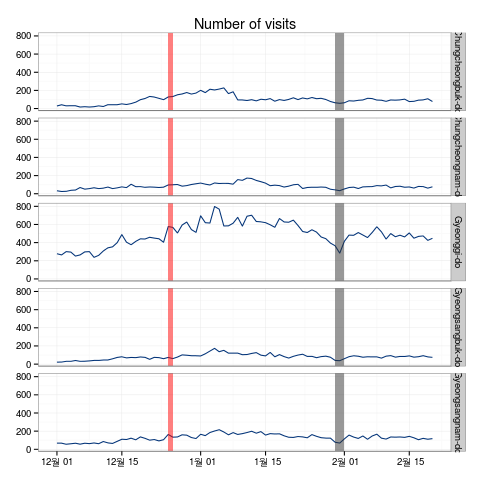

In [367]:
p1

#### 사이트 평균 머문 시간 그래프

In [368]:
p2 <- ggplot(d, aes(x=date_f, y=avgTimeOnSite,)) + 
  geom_line(colour="#781002") +   
  facet_grid (region ~ .) + 
  ggtitle("Average time on site") +
  geom_rect(data = rect_xmas, 
            aes(xmin=xmin,
                xmax=xmax,
                ymin=ymin, 
                ymax=ymax),
            fill="red", 
            alpha=0.5,
            inherit.aes = FALSE) +
  geom_rect(data = rect_newyear, 
            aes(xmin=xmin,
                xmax=xmax,
                ymin=ymin,
                ymax=ymax),
            fill="grey20", 
            alpha=0.5,
            inherit.aes = FALSE) +
  theme_bw() +
  theme(axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        panel.margin = unit(0.5, "lines"))

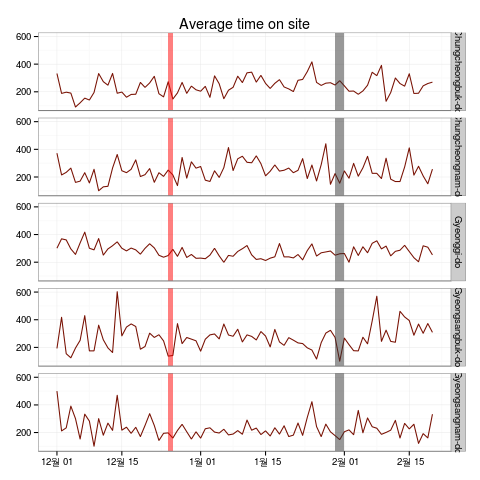

In [369]:
p2

#### 비교

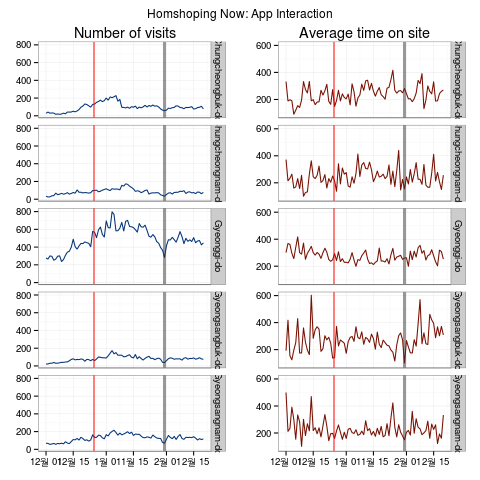

In [370]:
grid.arrange(arrangeGrob(p1,p2,ncol=2, main=textGrob("Homshoping Now: App Interaction", vjust=1.5)))

# 참고자료

* [1] http://www.r-bloggers.com/how-to-extract-google-analytics-data-in-r-using-rgoogleanalytics/
* [2] http://online-behavior.com/analytics/r